# Ressonância em um Pêndulo Forçado

* PET - Física UFRN
* Petiano: Gabriel Zuza
* Data: 09/2021

O Objetivo desse `Notebook`  não é abordar de forma teórica as deduções e métodos envolvidos nos problemas, mas na prática, aplicar tais conceitos obtendo resultados concretos e representativos.


Já publicamos sobre o Oscilador harmônimo diversas vezes nesse projeto, é recomendado ao leitor ver também [O Pêndulo de Wilberforce](https://github.com/GabrielZuza/PET/blob/master/Wilberforce_Pendulum.ipynb) e [O Pêndulo duplo](https://github.com/GabrielZuza/PET/blob/master/Duble_Pendulum.ipynb) onde falamos sobre o oscilador harmonico em condições de contorno e contextos diferentes. Nesse `Notebook` vamos avaliar como ocorre o fênomen
o de ressonância em um pendulo forçado.

## 1 Introdução Teórica

Um Pêndulo simples é um problema clássico da física e está presente em inúmeros exemplos de nosso dia a dia, desde o movimento de planetas, até a iterações entre átomos,de uma forma ou de outra. A Ressonância por sua vez nada mais é do que a transformação de energia por fenômenos periódicos, como por exemplo, no fenômeno bem conhecido de quebrar uma taça usando a vibração das cordas vocias. Ou seja, em nosso contexto, quando uma força externa tiver em ressonância com um determinado pêndulo, esse pêndulo aprensentará maior energia (devido a conversão de energia promovida pela força externa), energia essa representada no pêndulo pela sua amplitude. Essa é a fundamentação física do que será abordado

![solar layers](https://i.imgur.com/jgdJU8u.png)

Vamos considera um sistema composto por um pêndulo simples (haste não extensiva ou flexível com centro de massa localizado na extremidade) e a atuação de uma força externa angular, do ponto de vista experimental, esse sistema pode ser reproduzido ao acoplar um motor simples ao 'ponto fixo' onde o pendulo de sustenta, assim como mostrado no [video de 2 mins oferecido pela UNIVESP](https://www.youtube.com/watch?v=ynzk04wVn6k&ab_channel=FisicaUniversit%C3%A1ria) e representado brevemente em uma imagem abaixo (seria altamente recomendado ao leitor que assistisse ao vídeo referido para completa compreenção do problema)

O esquema que vamos usar e o diagrama de forças está disponível no esquema abaixo.

![solar layers](https://i.imgur.com/ZLuGEfu.jpg)


Para modelar o problema apresentado usaremos de um modelo físico deduzido a partir da análise do sistema aplicando a Segunda Lei de Newton angular, Como expressa pela Equação:

$$
I\alpha = - L (mg \sin \theta) + F_{\text{ext}}
$$

$$
I\frac{d^2\theta}{dt^2} = - l (mg \sin \theta) + F_{\text{ext}}
$$

$$
ml^2 \frac{d^2\theta}{dt^2} = - l (mg \sin \theta) + F_{\text{ext}}
$$

$$
l \frac{d^2\theta}{dt^2} = - (g \sin \theta) + (\frac{1}{ml}) F_{\text{ext}}
$$

Considerando uma solução estacionária em função de seno de $\theta$ e cosseno de $t$ para força externa, de modo a ser uma função peródica com constante de amplitude ($C$) e de fase ($\Omega$) e incorporando a massa e o comprimento na constante de amplitude intríssica da força, temos:

$$
\frac{d^2\theta}{dt^2} = - \frac{g}{l}\sin \theta + C\cos \theta\sin (\Omega t)
$$

$$
\frac{d^2\theta}{dt^2} + \frac{g}{l}\sin \theta - C\cos \theta\sin (\Omega t) = 0
$$

Onde, $\theta$ representa o ângulo do pendulo com o campo gravitacional; $g$ a graviadade; $l$ representa o comprimento do pendulo; $t$, o tempo; $\Omega$  e $C$ são constantes relacionadas a froça externa.

Para resolver essa EDO, foi utilizado o método muito conhecido e utilizado pela literatura, Runge-Kutta de 4° ordem. Vale ressaltar que trata-se de uma equação diferencial de 2$^a$ ordem e, é necessário adaptar o método dividindo a Equação Diferencial Ordinaria que haviamos obtido em duas EDOs de primeira ordem, usando uma variável auxiliar $\phi$. Obtendo duas equações:

$$
\frac{d\theta}{dt} = \phi \;\;\;\;\;\;\; e \;\;\;\;\;\;\; \frac{d\phi}{dt} = - \frac{g}{l}\sin \theta + C\cos \theta\sin (\Omega t)
$$

Veja que já aplicamos o método do Runge-Kutta em notebooks passados, pode ser de interesse do leitor ler [O Pêndulo de Wilberforce](https://github.com/GabrielZuza/PET/blob/master/Wilberforce_Pendulum.ipynb) e [O Pêndulo duplo](https://github.com/GabrielZuza/PET/blob/master/Duble_Pendulum.ipynb)

## 2 Implementando as Equações para um Pêndulo

### 2.1 Definindo funções e constantes

In [16]:
import numpy as np
import pylab as plt

Vamos definir a haste e a aceleração gravitacional, de modo que possa ser reproduzido em experimento, $l = 10\: \text{cm}$ e $g = 9.81\:\text{m}/\text{s}^2$, no SI.

In [39]:
l, g, C = 0.1, 9.81, 5

### 2.2 Definindo a Equação Diferencial Ordinária do Problema

Implementando a equação como descrita na introdução teórica

In [40]:
def f(r,t):
    theta = r[0]
    psi = r[1]
    ftheta = psi
    fpsi = -(g/l)*np.sin(theta) + C*np.cos(theta)*np.sin(omega*t)
    return np.array([ftheta,fpsi],float)

### 2.3 Definindo parâmetros e condições de contorno


Para resolver o Runge-Kutta manualmente, definimos $a$ e $b$ que seriam os valores iniciais e finais de tempo para a modelagem, $N$ o número do passo e com isso definir o $h$.

Além disso, vamos definir listas vaizias que aramzenarão os pontos a cada passo de tempo. A maioria das constantes são escolhidas arbitrariamente inclusive $\Omega$ que posteriormente será tratada com mais cautela.

In [41]:
a = 0.0
b = 50.0
N = 1000
h = (b-a)/N
omega = 2
t,ltheta,lpsi,lt = a,[],[],[]
r = np.array([np.deg2rad(45),np.deg2rad(45)],float)

### 2.4 Resolvendo a EDO por Runge-Kutta de 4$^a$ ordem

Implemantando o `loop` que calcula o Runge-Kutta.

In [42]:
while(t < b):
        lt.append(t)
        ltheta.append(r[0])
        lpsi.append(r[1])
        k1 = h*f(r,t)
        k2 = h*f(r+k1/2,t+h/2)
        k3 = h*f(r+k2/2,t+h/2)
        k4 = h*f(r+k3,t+h)
        r += (1/6)*(k1+2*k2+2*k3+k4)
        t += h

### 2.5 Visualizando o Resultado

Para um agrado estético, vamos aumentar um pouco a fonte dos gráficos globalmente, dessa forma todos os gráficos daqui em diante já contarão com essa alteração.

In [43]:
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

Para a posição angular vamos plotar usando subplots para ter acesso no mesmo freme, a uma imagem com zoom.

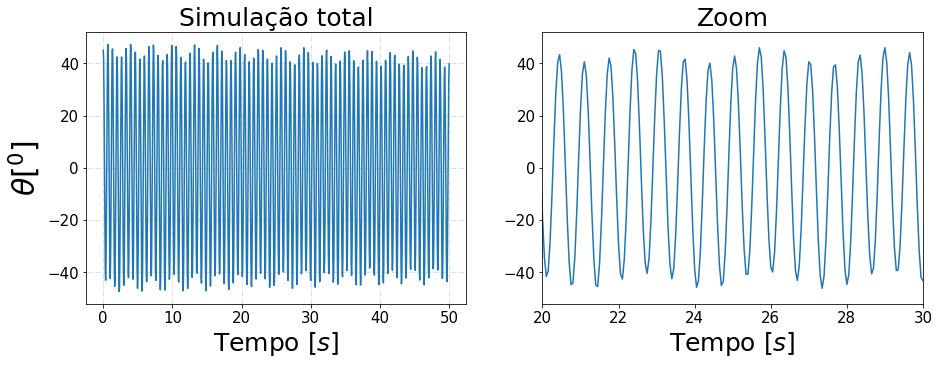

In [44]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(15,5))
plt.subplot(121)
plt.plot(lt, np.rad2deg(ltheta))
plt.grid(ls='-.',alpha=0.5)
plt.title("Simulação total",fontsize=25)
plt.xlabel(r'Tempo $[s]$',fontsize=25)
plt.ylabel(r'$\theta[^0]$',fontsize=30)
plt.subplot(122)
plt.plot(lt, np.rad2deg(ltheta))
plt.xlabel(r'Tempo $[s]$',fontsize=25)
plt.xlim(20,30)
plt.title("Zoom",fontsize=25)
plt.show()

O mesmo faremos para a velocidade angular

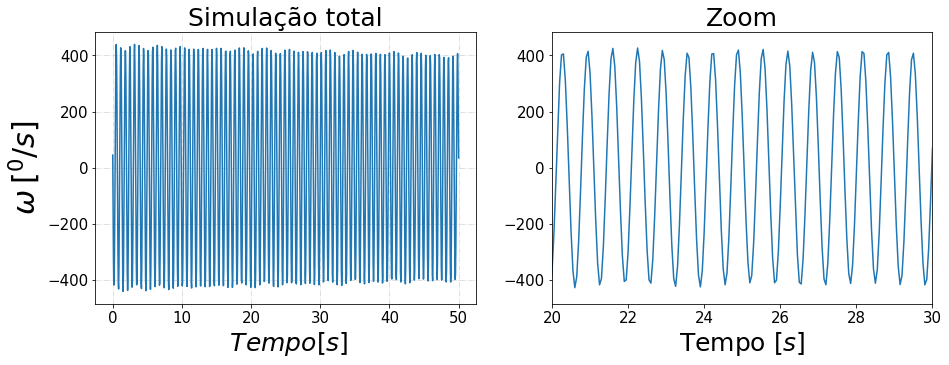

In [45]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(15,5))
plt.subplot(121)
plt.plot(lt,np.rad2deg(lpsi))
plt.grid(ls='-.',alpha=0.5)
plt.title("Simulação total",fontsize=25)
plt.xlabel(r' $Tempo[s]$',fontsize=25)
plt.ylabel(r'$\omega \:[^0/s]$',fontsize=30)
plt.subplot(122)
plt.plot(lt, np.rad2deg(lpsi))
plt.xlabel(r'Tempo $[s]$',fontsize=25)
plt.xlim(20,30)
plt.title("Zoom",fontsize=25)
plt.show()

## 3 Determinando a Ressonância

Novamente, vamos ajustar o tamanho da fonte, dessa vez um pouco maior ainda.

In [46]:
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25

Agora, vamos determinar visualmente um valor aproximado para a constante de fase da força externa que resultará em ressonância.
Vamos fazer um range de zero a 15, pegando os números inteiros e vamos avaliar o comportamento da EDO para cada condição de contorno..
Veja que como $\Omega$ é uma consntate de fase e as funções seno e cosseno são periódicas, não se faz necessário avaliar uma grande quantidade no espectro possível já que a partir de um certo ponto as soluções irão se repetir.

Para implementar isso, fazer um loop que rodará cada valor da constante pelo Runge-Kutta já apresentado e em seguida, o-plota.

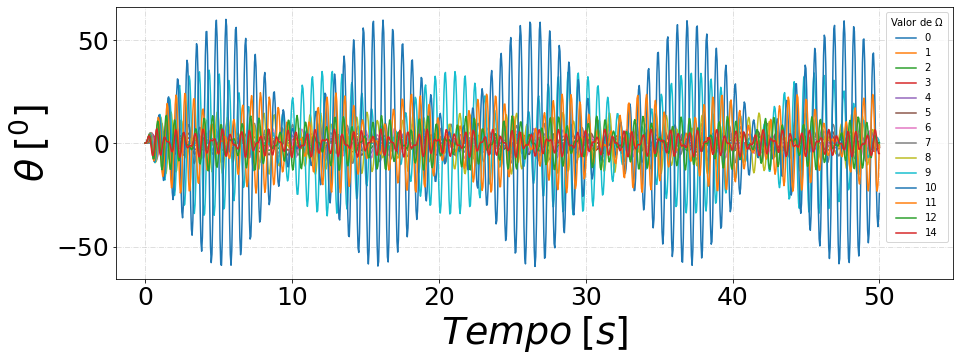

In [47]:
fig, ax = plt.subplots(figsize=(15,5))
qq = np.linspace(0,14,14)

for w in qq:
    omega = int(w)
    t, ltheta, lomega, lt = a, [], [], []
    r = np.array([0,0],float)
    while(t < b):
            lt.append(t)
            ltheta.append(r[0])
            lomega.append(r[1])
            k1 = h*f(r,t)
            k2 = h*f(r+k1/2,t+h/2)
            k3 = h*f(r+k2/2,t+h/2)
            k4 = h*f(r+k3,t+h)
            r += (1/6)*(k1+2*k2+2*k3+k4)
            t += h

    plt.plot(lt,np.rad2deg(ltheta),label=str(omega))

plt.legend(title = "Valor de $\Omega$")

plt.grid(ls='-.',alpha=0.5)
plt.xlabel(r'$Tempo\: [s]$',fontsize=38)
plt.ylabel(r'$\theta\:[^0]$',fontsize=38)
plt.xlim(-2,55)

plt.show()   

Ao analisar o resultado obtido, vemos que visivelmente a amplitudo aumenta quando $\Omega = 10$, agora vamos avaliar esse resultado em comparação com a nossa primeira simulação somente,para ter um noção da significancia dessa ressonância

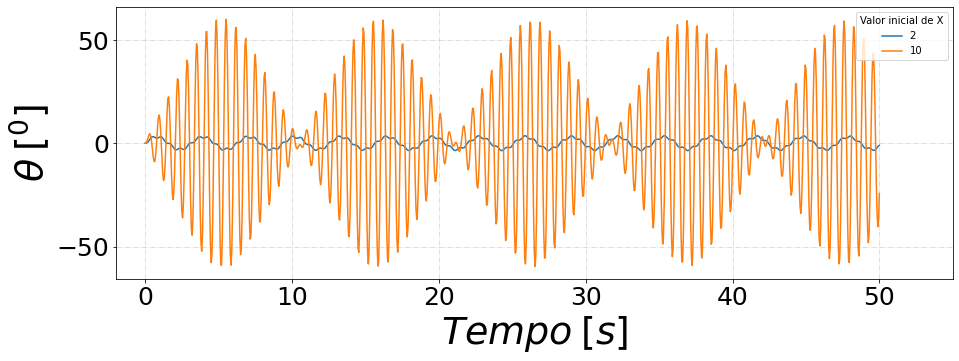

In [48]:
fig, ax = plt.subplots(figsize=(15,5))
qq = [2,10]
for w in qq:
    omega = int(w)
    t, ltheta, lomega, lt = a, [], [], []
    r = np.array([0,0],float)
    while(t < b):
            lt.append(t)
            ltheta.append(r[0])
            lomega.append(r[1])
            k1 = h*f(r,t)
            k2 = h*f(r+k1/2,t+h/2)
            k3 = h*f(r+k2/2,t+h/2)
            k4 = h*f(r+k3,t+h)
            r += (1/6)*(k1+2*k2+2*k3+k4)
            t += h
    #plotando
    plt.plot(lt,np.rad2deg(ltheta),label=str(omega))

plt.legend(title="Valor inicial de X")

plt.grid(ls='-.',alpha=0.5)
plt.xlabel(r'$Tempo\: [s]$',fontsize=38)
plt.ylabel(r'$\theta\:[^0]$',fontsize=38)
plt.xlim(-2,55)

plt.show()   

## 5 Referências


[1] - M. Newman, Computational Physics (2013)